# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


# TODO
- Remove duplicated data, example 'Google Pay'.
- Remove `NaN` from Rating.
- Convert `M` and `k` to milions and thounsands in Size.
- Change `Varies with device` in Size with median of the same Category.
- Change `Varies with device` in Android Ver with 'unknown' text.
- Remove `+` in Installs.
- Remove `$` in Price.



In [378]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [379]:
df = pd.read_csv('google-play-store.csv')

In [380]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [382]:
df[df.App == 'Google Pay']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1083,Google Pay,FINANCE,4.2,347838,Varies with device,"100,000,000+",Free,0,Everyone,Finance,"July 26, 2018",2.70.206190089,Varies with device
1096,Google Pay,FINANCE,4.2,347838,Varies with device,"100,000,000+",Free,0,Everyone,Finance,"July 26, 2018",2.70.206190089,Varies with device
1163,Google Pay,FINANCE,4.2,347874,Varies with device,"100,000,000+",Free,0,Everyone,Finance,"July 26, 2018",2.70.206190089,Varies with device
5601,Google Pay,FINANCE,4.2,348132,Varies with device,"100,000,000+",Free,0,Everyone,Finance,"July 26, 2018",2.70.206190089,Varies with device


In [383]:
df = df.drop_duplicates(subset=['App' , 'Current Ver'])

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9686 entries, 0 to 10840
Data columns (total 13 columns):
App               9686 non-null object
Category          9686 non-null object
Rating            8222 non-null float64
Reviews           9686 non-null object
Size              9686 non-null object
Installs          9686 non-null object
Type              9685 non-null object
Price             9686 non-null object
Content Rating    9685 non-null object
Genres            9686 non-null object
Last Updated      9686 non-null object
Current Ver       9678 non-null object
Android Ver       9683 non-null object
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [385]:
# preprocess Rating
print('NaN percent: ', df['Rating'].isna().sum() /  df['Rating'].size)
print(df['Category'].unique())
print(df[df['Category'] == '1.9'])

NaN percent:  0.1511459838942804
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  


In [386]:
# We have a strange Category '1.9' for App name 'Life Made WI-Fi Touchscreen Photo Frame'
# This app is PHOTOGRAPHY
df['Category'][10472] = 'PHOTOGRAPHY'
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                      PHOTOGRAPHY
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [387]:
print(df.groupby('Category').mean()['Rating'])

Category
ART_AND_DESIGN         4.357377
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.344970
BUSINESS               4.098479
COMICS                 4.181481
COMMUNICATION          4.121401
DATING                 3.971852
EDUCATION              4.364407
ENTERTAINMENT          4.135294
EVENTS                 4.435556
FAMILY                 4.180235
FINANCE                4.115563
FOOD_AND_DRINK         4.172632
GAME                   4.248362
HEALTH_AND_FITNESS     4.243033
HOUSE_AND_HOME         4.150000
LIBRARIES_AND_DEMO     4.178125
LIFESTYLE              4.093355
MAPS_AND_NAVIGATION    4.036441
MEDICAL                4.171088
NEWS_AND_MAGAZINES     4.121569
PARENTING              4.300000
PERSONALIZATION        4.332215
PHOTOGRAPHY            4.212782
PRODUCTIVITY           4.184106
SHOPPING               4.231492
SOCIAL                 4.247291
SPORTS                 4.216154
TOOLS                  4.041193
TRAVEL_AND_LOCAL       4.069519

In [388]:
# Convert M and k to milions and thounsands in Size.
def convert_size(sizeStr):
    if('M' in sizeStr):
        return float(sizeStr.split('M')[0]) * 1000000
    if('k' in sizeStr):
        return float(sizeStr.split('k')[0]) * 1000
    else:
        return -1 # we mask -1 for `Varial of Device` so that df['Size'] will be float64 type
    
df['Size'] = df['Size'].apply(convert_size)
df['Size'] 

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
5         5600000.0
6        19000000.0
7        29000000.0
8        33000000.0
9         3100000.0
10       28000000.0
11       12000000.0
12       20000000.0
13       21000000.0
14       37000000.0
15        2700000.0
16        5500000.0
17       17000000.0
18       39000000.0
19       31000000.0
20       14000000.0
21       12000000.0
22        4200000.0
23        7000000.0
24       23000000.0
25        6000000.0
26       25000000.0
27        6100000.0
28        4600000.0
29        4200000.0
            ...    
10811     3900000.0
10812    13000000.0
10813     2700000.0
10814    31000000.0
10815     4900000.0
10816     6800000.0
10817     8000000.0
10818     1500000.0
10819     3600000.0
10820     8600000.0
10821     2500000.0
10822     3100000.0
10823     2900000.0
10824    82000000.0
10825     7700000.0
10826          -1.0
10827    13000000.0
10828    13000000.0
10829     7400000.0


In [389]:
# `Varies with device` in Size
print('Varies with device percent: ', df[df['Size']== - 1]['Size'].size /  df['Size'].size * 100 , '%')
medianSizeEachCategory = df[df['Size'] != 'Varies with device' ].groupby('Category').mean()
medianSizeEachCategory

Varies with device percent:  12.729712987817468 %


,Rating,Size
Category,,
ART_AND_DESIGN,4.357377,1.198437e+07
AUTO_AND_VEHICLES,4.190411,1.767984e+07
BEAUTY,4.278571,1.223396e+07
BOOKS_AND_REFERENCE,4.344970,1.147807e+07
BUSINESS,4.098479,1.241444e+07
COMICS,4.181481,1.207059e+07
COMMUNICATION,4.121401,8.691133e+06
DATING,3.971852,1.447743e+07
EDUCATION,4.364407,1.425279e+07


In [390]:
# set median value for Size
def get_median_size(category):
    return medianSizeEachCategory.loc[ category ,'Size']

for index, row in df.iterrows():
    if(row['Size']== -1):
        df.set_value(index, 'Size' ,  get_median_size( df.loc[index]['Category']))

print(df[df['Size']== -1]['Size'].size)


0


In [391]:
# Change `Varies with device` in Android Ver with 'unknown' text.
df.loc[df['Android Ver'] == 'Varies with device' , 'Android Ver' ] = 'unknown'
df[df['Android Ver'] == 'Varies with device'].size

0

In [392]:
# Remove `+` in Installs

df['Installs'] = df['Installs'].str.replace('+' , '').str.replace(',' ,'')

# Remove 'Free' value in Installs

df = df.drop(df[df.Installs == 'Free'].index)

# Convert to int64
df['Installs'] = df['Installs'].astype('int64')
df['Installs'].unique()


array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [393]:
#Remove `$` in Price.
df['Price'] = df['Price'].str.replace('$', '')
# convert to float
df.Price= df.Price.astype('float')
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

# Visualize Data

In [394]:

categoryData = df.groupby('Category').mean()
categoryData

,Rating,Size,Installs,Price
Category,,,,
ART_AND_DESIGN,4.357377,1.235889e+07,1.786533e+06,0.093281
AUTO_AND_VEHICLES,4.190411,1.975982e+07,6.250613e+05,0.158471
BEAUTY,4.278571,1.361894e+07,5.131519e+05,0.000000
BOOKS_AND_REFERENCE,4.344970,1.292576e+07,7.504367e+06,0.539505
BUSINESS,4.098479,1.371500e+07,1.659916e+06,0.417357
COMICS,4.181481,1.357941e+07,8.032348e+05,0.000000
COMMUNICATION,4.121401,1.069889e+07,3.493442e+07,0.263101
DATING,3.971852,1.557165e+07,8.774774e+05,0.159535
EDUCATION,4.364407,1.784593e+07,2.965983e+06,0.150924


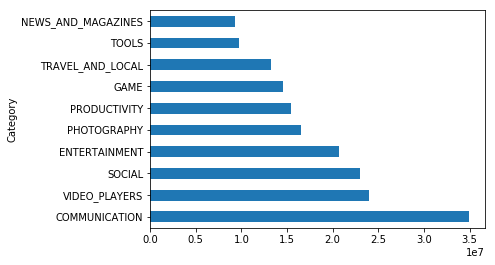

In [395]:
# The top Installs for each Category
categoryData.Installs.sort_values(ascending=False).head(10).plot( kind='barh' )

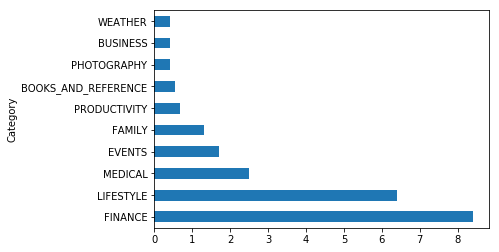

In [396]:
# The top Price for each Category
categoryData.Price.sort_values(ascending=False).head(10).plot( kind='barh' )

In [397]:
# The top 10 Installs for FIANCE app
top10Finance = df[df.Category == 'FINANCE'].sort_values(by ='Installs' , ascending = False ).head(10)

In [401]:
import seaborn as sns

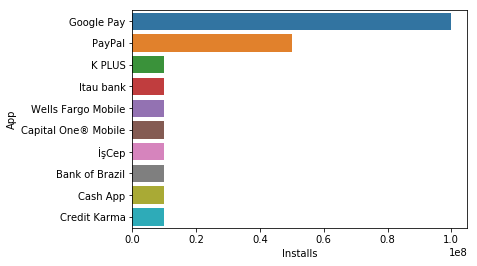

In [405]:
sns.barplot(y='App', x = 'Installs' , data = top10Finance)

# export data to csv


In [408]:
export_csv = df.to_csv('./exported_google_play_store.csv', index = None, header=True)